In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
trips_per_day = pd.read_csv('trips_per_day.csv')

In [3]:
trips_per_day = trips_per_day.drop('Unnamed: 0', axis=1)

In [4]:
trips_per_day.head()

,Date,from_station_name,Mean_Temperature_F,Events,number_of_trips
0,01/01/2015,12th Ave & E Denny Way,35.0,BLANK,10
1,01/01/2015,12th Ave & E Mercer St,35.0,BLANK,6
2,01/01/2015,15th Ave E & E Thomas St,35.0,BLANK,4
3,01/01/2015,1st Ave & Marion St,35.0,BLANK,8
4,01/01/2015,2nd Ave & Blanchard St,35.0,BLANK,14


In [5]:
trips_per_day1 = pd.get_dummies(trips_per_day, columns=['Events'])
trips_per_day1.sample(5)

,Date,from_station_name,Mean_Temperature_F,number_of_trips,Events_BLANK,Events_Fog,Events_Fog-Rain,Events_Rain,Events_Rain-Snow,Events_Rain-Thunderstorm,Events_Snow
18565,18/06/2015,Terry Ave & Stewart St,70.0,1,1,0,0,0,0,0,0
23048,22/07/2015,Key Arena / 1st Ave N & Harrison St,68.0,9,1,0,0,0,0,0,0
6417,07/02/2015,6th Ave & Blanchard St,54.0,2,0,0,0,1,0,0,0
3194,04/01/2016,Key Arena / 1st Ave N & Harrison St,38.0,2,0,0,0,1,0,0,0
24404,23/10/2015,2nd Ave & Pine St,52.0,6,0,1,0,0,0,0,0


In [6]:
trips_per_day1.columns

Index(['Date', 'from_station_name', 'Mean_Temperature_F', 'number_of_trips',
       'Events_BLANK', 'Events_Fog', 'Events_Fog-Rain', 'Events_Rain',
       'Events_Rain-Snow', 'Events_Rain-Thunderstorm', 'Events_Snow'],
      dtype='object')

# Test size 0.3

In [7]:
X = trips_per_day1[['Mean_Temperature_F',
                    'Events_BLANK', 
                    'Events_Fog', 
                    'Events_Fog-Rain', 
                    'Events_Rain',
                    'Events_Rain-Snow', 
                    'Events_Rain-Thunderstorm', 
                    'Events_Snow']]

y = trips_per_day1['number_of_trips']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state =42) 

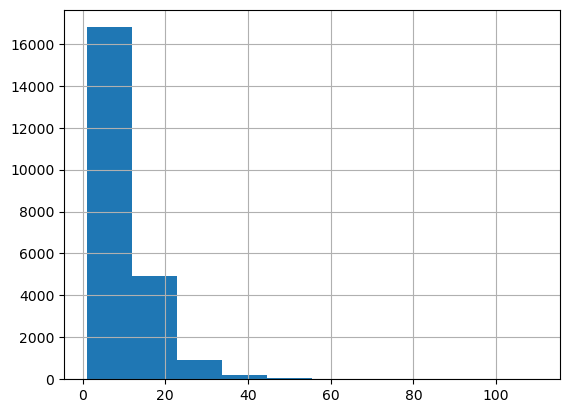

In [8]:
y_train.hist();

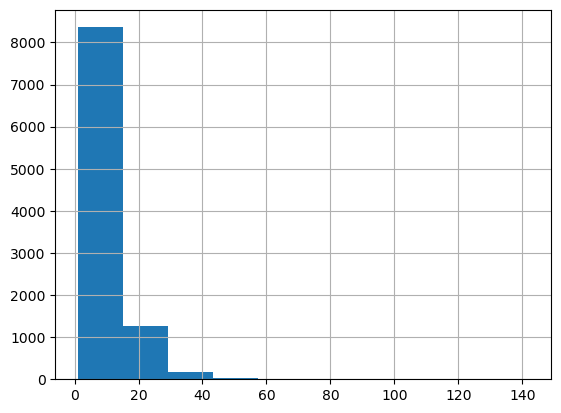

In [9]:
y_test.hist();

In [10]:
scaler =  StandardScaler()
scaler_target = StandardScaler()

In [11]:
cols = list(X_train.columns)
cols

['Mean_Temperature_F',
 'Events_BLANK',
 'Events_Fog',
 'Events_Fog-Rain',
 'Events_Rain',
 'Events_Rain-Snow',
 'Events_Rain-Thunderstorm',
 'Events_Snow']

In [12]:
X_train

,Mean_Temperature_F,Events_BLANK,Events_Fog,Events_Fog-Rain,Events_Rain,Events_Rain-Snow,Events_Rain-Thunderstorm,Events_Snow
24424,52.0,0,1,0,0,0,0,0
32222,59.0,1,0,0,0,0,0,0
5090,57.0,0,0,0,1,0,0,0
21877,64.0,0,0,0,1,0,0,0
11192,64.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
29802,56.0,0,0,0,1,0,0,0
5390,56.0,0,0,0,1,0,0,0
860,52.0,1,0,0,0,0,0,0
15795,48.0,1,0,0,0,0,0,0


In [13]:
X_train[cols] = scaler.fit_transform(X_train)
X_test[cols] = scaler.transform(X_test) 

In [14]:
y_train = scaler_target.fit_transform(y_train.values.reshape(-1, 1)) 
y_test = scaler_target.transform(y_test.values.reshape(-1, 1))

In [15]:
y_train

array([[-0.92283904],
       [ 0.84837316],
       [ 0.1671377 ],
       ...,
       [ 3.16457374],
       [-0.37785067],
       [ 3.16457374]])

In [16]:
X_train.describe()

,Mean_Temperature_F,Events_BLANK,Events_Fog,Events_Fog-Rain,Events_Rain,Events_Rain-Snow,Events_Rain-Thunderstorm,Events_Snow
count,2.290000e+04,2.290000e+04,2.290000e+04,2.290000e+04,2.290000e+04,2.290000e+04,2.290000e+04,2.290000e+04
mean,-7.291596e-17,7.322624e-17,-5.833277e-17,1.799628e-17,-1.241123e-18,3.180377e-17,2.241778e-17,-2.358133e-17
std,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00
min,-2.335432e+00,-1.087960e+00,-1.549609e-01,-1.396410e-01,-8.144183e-01,-5.293952e-02,-1.048470e-01,-5.416964e-02
25%,-7.917318e-01,-1.087960e+00,-1.549609e-01,-1.396410e-01,-8.144183e-01,-5.293952e-02,-1.048470e-01,-5.416964e-02
50%,-1.988188e-02,9.191518e-01,-1.549609e-01,-1.396410e-01,-8.144183e-01,-5.293952e-02,-1.048470e-01,-5.416964e-02
75%,8.484493e-01,9.191518e-01,-1.549609e-01,-1.396410e-01,1.227870e+00,-5.293952e-02,-1.048470e-01,-5.416964e-02
max,2.488631e+00,9.191518e-01,6.453241e+00,7.161222e+00,1.227870e+00,1.888948e+01,9.537708e+00,1.846053e+01


In [17]:
print(y_train.std(), y_train.mean())
print(y_test.std(), y_test.mean())

1.0 -1.0549542801678343e-16
1.0161486391359706 -0.0037437785456346908


In [18]:
X_train.columns

Index(['Mean_Temperature_F', 'Events_BLANK', 'Events_Fog', 'Events_Fog-Rain',
       'Events_Rain', 'Events_Rain-Snow', 'Events_Rain-Thunderstorm',
       'Events_Snow'],
      dtype='object')

In [19]:
cols = ['Mean_Temperature_F']

In [20]:
# call the method
regressor = LinearRegression(fit_intercept = False) 
# fit_intercept = false, do not try and fit. If scaled the mean of every feature already is 0. 
# This kind of model will always go through 0

# Fit the model <- THIS IS ML
regressor.fit(X_train[cols], y_train) # Both the training data's

# Carry out predictions on our test set
y_pred = regressor.predict(X_test[cols])

In [21]:
y_pred

array([[ 0.04180255],
       [-0.13774045],
       [-0.07789278],
       ...,
       [ 0.11661213],
       [ 0.01187872],
       [ 0.0866883 ]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


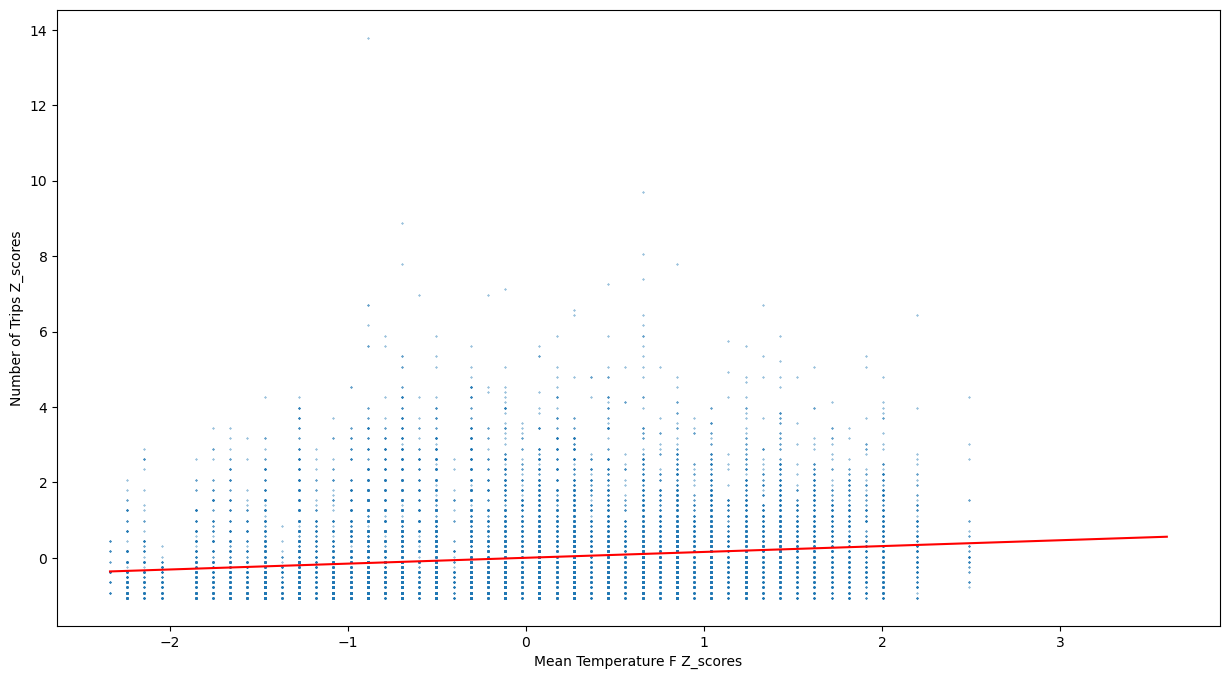

In [22]:
plt.figure(figsize=(15, 8))
plt.scatter(X_train[cols], y_train, s=0.1)

x = np.linspace(X_train[cols].min(), 3.6, 100)

y = regressor.predict(x)

plt.plot(x, y, '-r')

# # Adding labels to each axis
plt.xlabel('Mean Temperature F Z_scores')
plt.ylabel('Number of Trips Z_scores')

# calling the plot
plt.show()

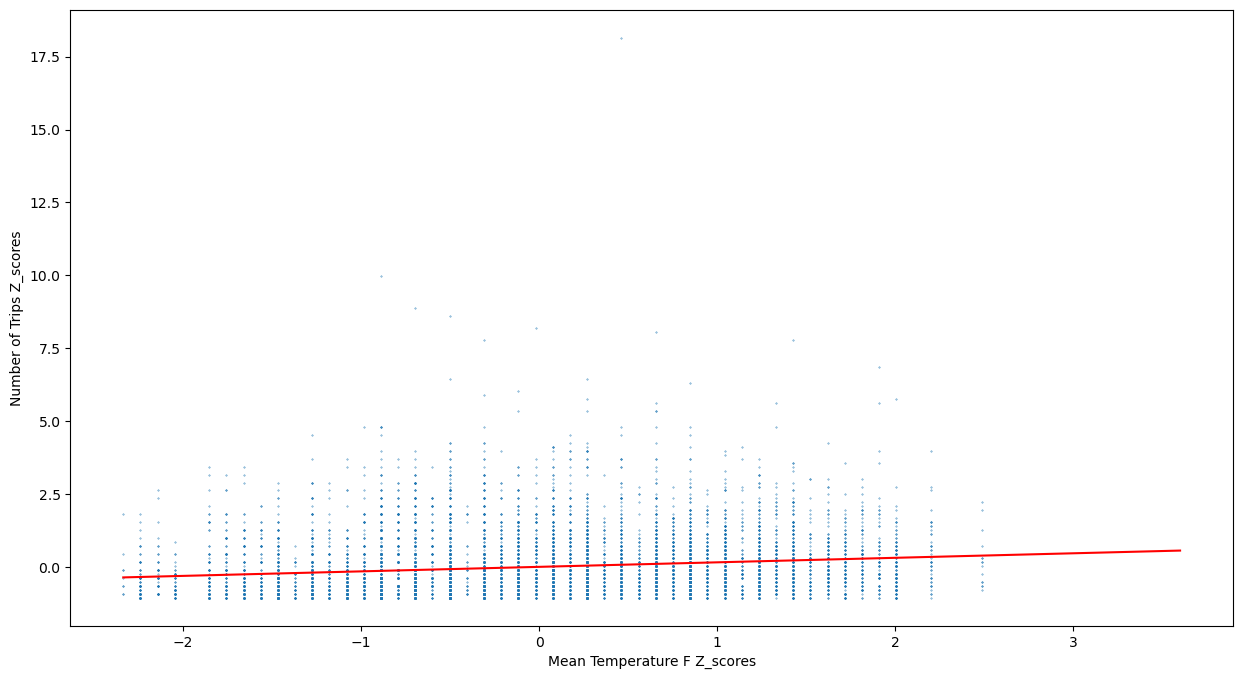

In [23]:
# Same as above
# notice the difference in the scatter plot
plt.figure(figsize=(15, 8))
plt.scatter(X_test[cols], y_test, s=0.1)
x = np.linspace(X_train[cols].min(),3.6,100)
y = (regressor.coef_)*x+(regressor.intercept_)

plt.plot(x, y, '-r', label='Model')
plt.xlabel('Mean Temperature F Z_scores')
plt.ylabel('Number of Trips Z_scores')
plt.show()

In [24]:
# first we need to reverse the transformation so we have meanginful results
# calling inverse_transform on our scaler
y_true = scaler_target.inverse_transform(y_test) # <- observed y values
y_pred_inverse = scaler_target.inverse_transform(y_pred) # <- predicted y

In [25]:
# Calculating the errors
mae = mean_absolute_error(y_true, y_pred_inverse)
mse = mean_squared_error(y_true, y_pred_inverse)
rmse = np.sqrt(mse)

# Calculting the R^2
r2 = r2_score(y_true, y_pred_inverse)

In [26]:
print('MAE = ', mae.round(2))
print('MSE = ', mse.round(2))
print('RMSE = ', rmse.round(2))
print('R^2 = ', r2.round(2))

MAE =  5.3
MSE =  54.7
RMSE =  7.4
R^2 =  0.02


# Change test size to 0.2

In [27]:
X = trips_per_day1[['Mean_Temperature_F',
                    'Events_BLANK', 
                    'Events_Fog', 
                    'Events_Fog-Rain', 
                    'Events_Rain',
                    'Events_Rain-Snow', 
                    'Events_Rain-Thunderstorm', 
                    'Events_Snow']]

y = trips_per_day1['number_of_trips']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state =42)

In [28]:
cols = list(X_train.columns)
cols

['Mean_Temperature_F',
 'Events_BLANK',
 'Events_Fog',
 'Events_Fog-Rain',
 'Events_Rain',
 'Events_Rain-Snow',
 'Events_Rain-Thunderstorm',
 'Events_Snow']

In [29]:
X_train[cols] = scaler.fit_transform(X_train)
X_test[cols] = scaler.transform(X_test) 

In [30]:
y_train = scaler_target.fit_transform(y_train.values.reshape(-1, 1)) 
y_test = scaler_target.transform(y_test.values.reshape(-1, 1))

In [31]:
print(y_train.std(), y_train.mean())
print(y_test.std(), y_test.mean())

1.0 1.0303032562316904e-16
1.0232936882914232 0.0005829538733390925


In [32]:
cols = ['Mean_Temperature_F']

In [33]:
# call the method
regressor = LinearRegression(fit_intercept = False) 
# fit_intercept = false, do not try and fit. If scaled the mean of every feature already is 0. 
# This kind of model will always go through 0

# Fit the model <- THIS IS ML
regressor.fit(X_train[cols], y_train) # Both the training data's

# Carry out predictions on our test set
y_pred = regressor.predict(X_test[cols])

In [34]:
y_pred

array([[ 0.04115951],
       [-0.13674502],
       [-0.07744351],
       ...,
       [ 0.10046102],
       [ 0.27836555],
       [-0.03296738]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


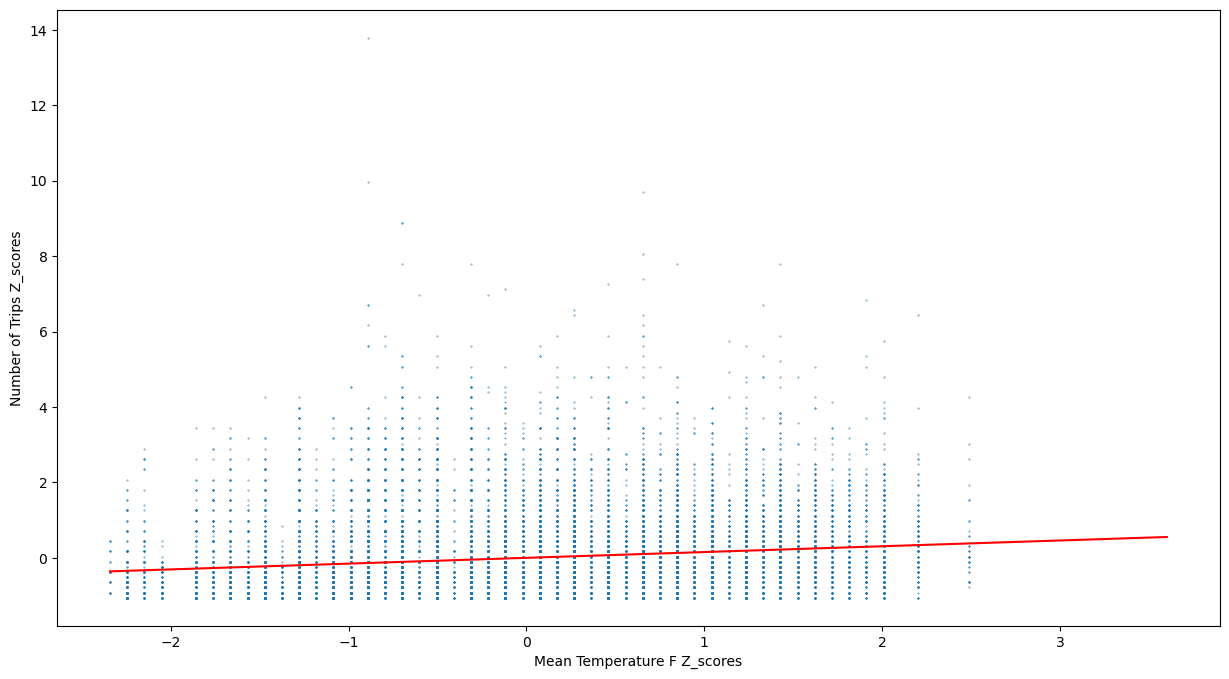

In [35]:
plt.figure(figsize=(15, 8))
plt.scatter(X_train[cols], y_train, s=0.1)

x = np.linspace(X_train[cols].min(), 3.6, 100)

y = regressor.predict(x)

plt.plot(x, y, '-r')

# # Adding labels to each axis
plt.xlabel('Mean Temperature F Z_scores')
plt.ylabel('Number of Trips Z_scores')

# calling the plot
plt.show()

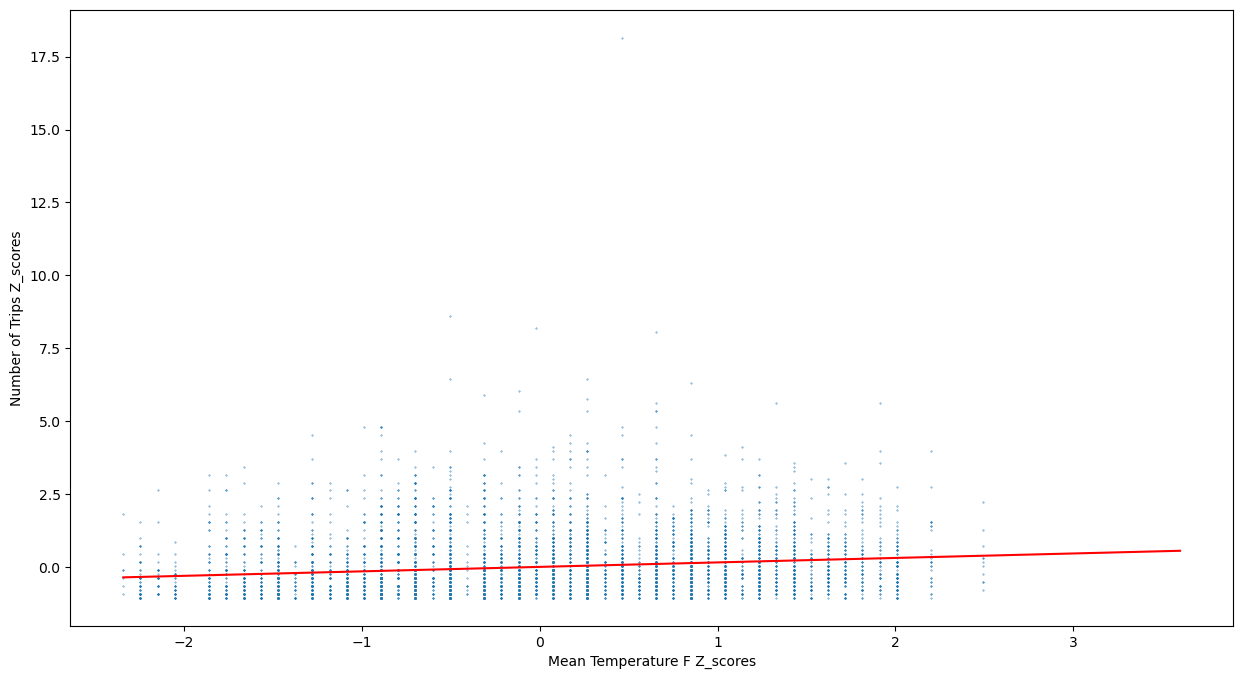

In [36]:
# Same as above
# notice the difference in the scatter plot
plt.figure(figsize=(15, 8))
plt.scatter(X_test[cols], y_test, s=0.1)
x = np.linspace(X_train[cols].min(),3.6,100)
y = (regressor.coef_)*x+(regressor.intercept_)

plt.plot(x, y, '-r', label='Model')
plt.xlabel('Mean Temperature F Z_scores')
plt.ylabel('Number of Trips Z_scores')
plt.show()

In [37]:
# first we need to reverse the transformation so we have meanginful results
# calling inverse_transform on our scaler
y_true = scaler_target.inverse_transform(y_test) # <- observed y values
y_pred_inverse = scaler_target.inverse_transform(y_pred) # <- predicted y

In [38]:
# Calculating the errors
mae = mean_absolute_error(y_true, y_pred_inverse)
mse = mean_squared_error(y_true, y_pred_inverse)
rmse = np.sqrt(mse)

# Calculting the R^2
r2 = r2_score(y_true, y_pred_inverse)

In [39]:
print('MAE = ', mae.round(2))
print('MSE = ', mse.round(2))
print('RMSE = ', rmse.round(2))
print('R^2 = ', r2.round(2))

MAE =  5.34
MSE =  55.57
RMSE =  7.45
R^2 =  0.02


# Multi Linear Regression

In [40]:
cols =['Mean_Temperature_F', 'Events_BLANK', 'Events_Fog', 'Events_Fog-Rain',
       'Events_Rain', 'Events_Rain-Snow', 'Events_Rain-Thunderstorm',
       'Events_Snow']

In [41]:
# call the method
regressor = LinearRegression( fit_intercept = False)

# Fit the model
regressor.fit(X_train[cols],y_train)

# Carry out predictions on our test set
y_pred = regressor.predict(X_test[cols])

# first we need to reverse the transformation so we have meanginful results
y_true = scaler_target.inverse_transform(y_test)
y_pred = scaler_target.inverse_transform(y_pred)

# Calculating the errors
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

# Calculting the R^2
r2 = r2_score(y_true, y_pred)

# Viewing these results
print('MAE = ', mae.round(4))
print('MSE = ', mse.round(4))
print('RMSE = ', rmse.round(4))
print('R^2 = ', r2.round(4))

MAE =  5.3205
MSE =  55.2689
RMSE =  7.4343
R^2 =  0.0205


In [42]:
regressor.score(X_test[cols],y_test)

0.02054102583823858

# Decision Tree

In [43]:
tree = trips_per_day

In [44]:
le = LabelEncoder()
tree['from_station_name'] = le.fit_transform(tree['from_station_name'])

tree['Date'] = pd.to_datetime(tree['Date'])
tree['DayOfWeek'] = tree['Date'].dt.dayofweek
tree['Month'] = tree['Date'].dt.month
tree['Year'] = tree['Date'].dt.year

X = tree[['from_station_name', 'DayOfWeek', 'Month', 'Year', 'Mean_Temperature_F']]
y = tree[['number_of_trips']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

C:\Users\Admin\AppData\Local\Temp\ipykernel_1192\2188996527.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  tree['Date'] = pd.to_datetime(tree['Date'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_1192\2188996527.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Mean Squared Error: 34.364248316290194


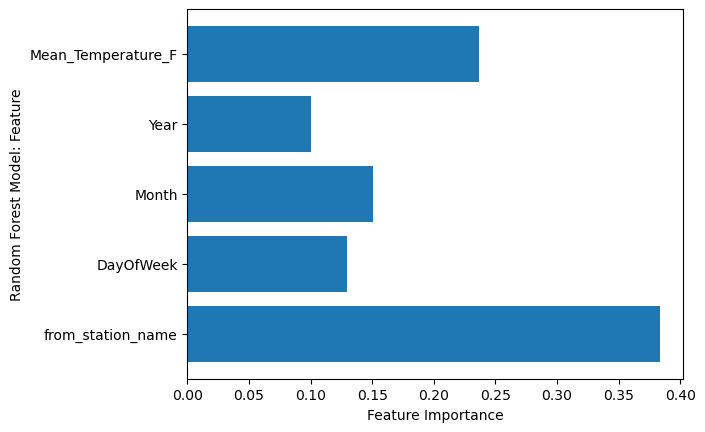

In [45]:
feature_importance = rf_model.feature_importances_
feature_names = X.columns

plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Random Forest Model: Feature')
plt.show();

# Using specific time period

In [46]:
trips_per_day['Date'] = pd.to_datetime(trips_per_day['Date'])
trips_per_day['DayOfWeek'] = trips_per_day['Date'].dt.dayofweek
trips_per_day['Month'] = trips_per_day['Date'].dt.month
trips_per_day['Year'] = trips_per_day['Date'].dt.year
trips_per_day.head()

,Date,from_station_name,Mean_Temperature_F,Events,number_of_trips,DayOfWeek,Month,Year
0,2015-01-01,0,35.0,BLANK,10,3,1,2015
1,2015-01-01,1,35.0,BLANK,6,3,1,2015
2,2015-01-01,4,35.0,BLANK,4,3,1,2015
3,2015-01-01,6,35.0,BLANK,8,3,1,2015
4,2015-01-01,7,35.0,BLANK,14,3,1,2015


In [47]:
trips_per_day.columns

Index(['Date', 'from_station_name', 'Mean_Temperature_F', 'Events',
       'number_of_trips', 'DayOfWeek', 'Month', 'Year'],
      dtype='object')

In [48]:
X = trips_per_day[['DayOfWeek', 
                    'Month', 
                    'Year']]

y = trips_per_day['number_of_trips']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state =42)

In [49]:
cols = list(X_train.columns)
cols

['DayOfWeek', 'Month', 'Year']

In [50]:
X_train[cols] = scaler.fit_transform(X_train)
X_test[cols] = scaler.transform(X_test) 

In [51]:
y_train = scaler_target.fit_transform(y_train.values.reshape(-1, 1)) 
y_test = scaler_target.transform(y_test.values.reshape(-1, 1))

In [52]:
print(y_train.std(), y_train.mean())
print(y_test.std(), y_test.mean())

1.0 1.0303032562316904e-16
1.0232936882914232 0.0005829538733390925


In [53]:
cols = ['Month']

In [54]:
# call the method
regressor = LinearRegression(fit_intercept = False) 
# fit_intercept = false, do not try and fit. If scaled the mean of every feature already is 0. 
# This kind of model will always go through 0

# Fit the model <- THIS IS ML
regressor.fit(X_train[cols], y_train) # Both the training data's

# Carry out predictions on our test set
y_pred = regressor.predict(X_test[cols])

In [55]:
y_pred

array([[-0.01013449],
       [ 0.02164884],
       [ 0.00973009],
       ...,
       [-0.02205324],
       [ 0.00178426],
       [-0.01410741]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


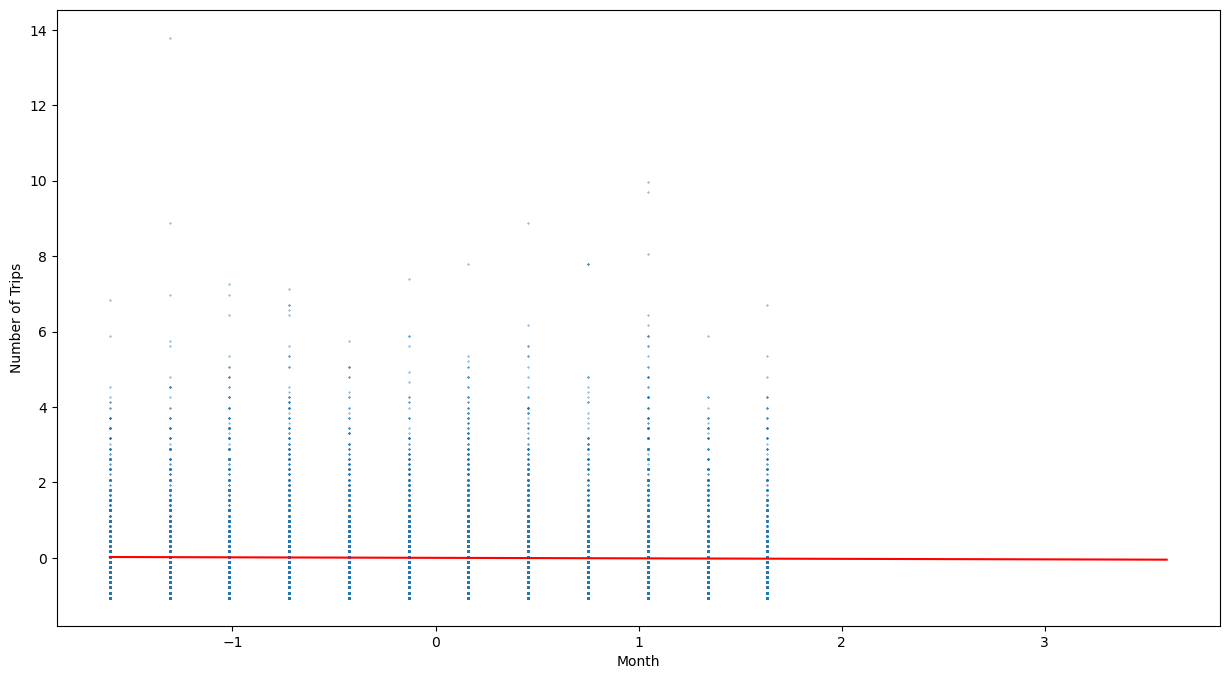

In [56]:
plt.figure(figsize=(15, 8))
plt.scatter(X_train[cols], y_train, s=0.1)

x = np.linspace(X_train[cols].min(), 3.6, 100)

y = regressor.predict(x)

plt.plot(x, y, '-r')

# # Adding labels to each axis
plt.xlabel('Month')
plt.ylabel('Number of Trips')

# calling the plot
plt.show()

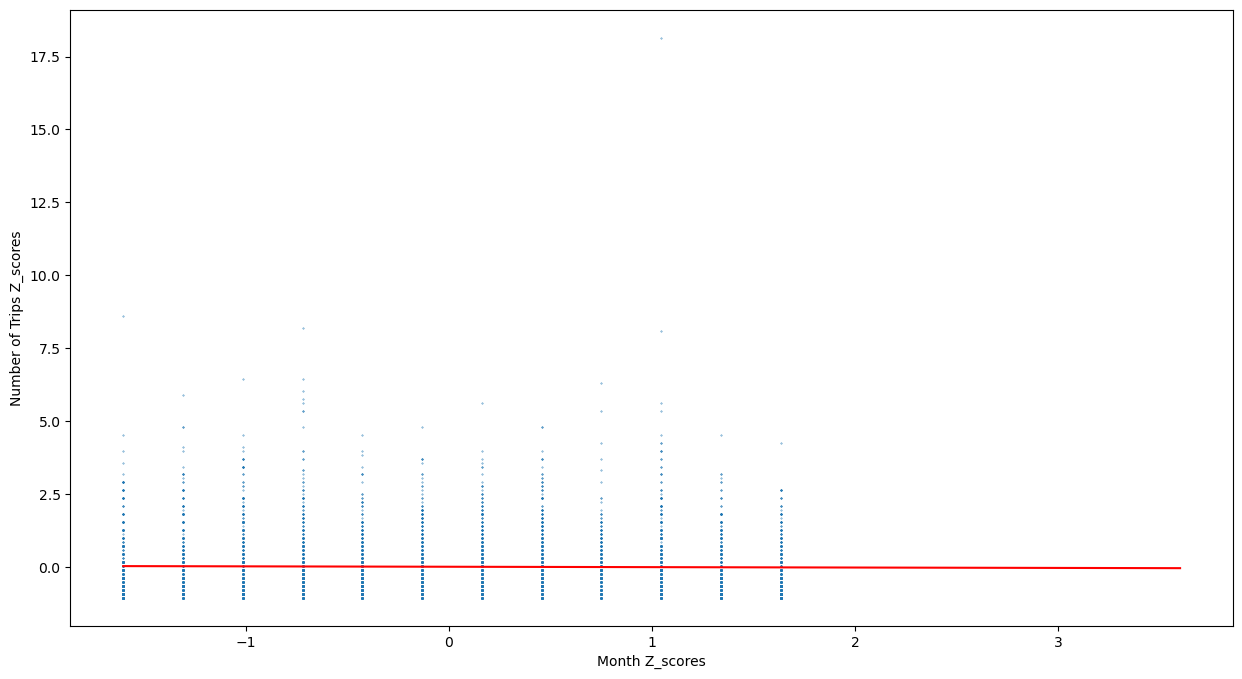

In [57]:
# Same as above
# notice the difference in the scatter plot
plt.figure(figsize=(15, 8))
plt.scatter(X_test[cols], y_test, s=0.1)
x = np.linspace(X_train[cols].min(),3.6,100)
y = (regressor.coef_)*x+(regressor.intercept_)

plt.plot(x, y, '-r', label='Model')
plt.xlabel('Month Z_scores')
plt.ylabel('Number of Trips Z_scores')
plt.show()

In [58]:
# first we need to reverse the transformation so we have meanginful results
# calling inverse_transform on our scaler
y_true = scaler_target.inverse_transform(y_test) # <- observed y values
y_pred_inverse = scaler_target.inverse_transform(y_pred) # <- predicted y

In [59]:
# Calculating the errors
mae = mean_absolute_error(y_true, y_pred_inverse)
mse = mean_squared_error(y_true, y_pred_inverse)
rmse = np.sqrt(mse)

# Calculting the R^2
r2 = r2_score(y_true, y_pred_inverse)

In [60]:
print('MAE = ', mae.round(2))
print('MSE = ', mse.round(2))
print('RMSE = ', rmse.round(2))
print('R^2 = ', r2.round(2))

MAE =  5.44
MSE =  56.39
RMSE =  7.51
R^2 =  0.0
